**SETTiNGS**

In [1]:
#Select results to plot ('' will load the most recent assimilation file)
filename = ''
filename=filename.replace('/',':')

import os
wd = '/Users/chrishancock/Library/CloudStorage/OneDrive-NorthernArizonaUniversity/Research/Manuscript/DAMP21k/' #changed
os.chdir(wd+'Holocene-code') #

# Math Functions
import numpy as np
import scipy.stats
import pandas as pd
import xarray as xr
# Plotting Functions
import matplotlib.pyplot   as plt         # Packages for making figures
import matplotlib.cm       as cm
import matplotlib.gridspec as gridspec
import cartopy.crs         as ccrs        # Packages for mapping in python
import cartopy.feature     as cfeature
import cartopy.util        as cutil
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# DA Functions
import da_utils_plotting as da_plot
import da_load_proxies
import da_load_models
import da_psms
print('packages loaded')
font = {'family': 'sans-serif', 'sans-serif': 'Lucida Grande'}

packages loaded


**LOAD DATA**

In [2]:
# If don't define a reconstruction, Get the most recent filename
if filename == '':
    filename = [f for f in os.listdir(wd+'Data/results') if os.path.isdir(os.path.join(wd+'Data/results', f))]
    filename = filename[np.argmax([os.path.getmtime(wd+'Data/results/'+f+'/'+f+'.nc') for f in filename])]
print('loading '+filename)
# Load Data
options, DAMPvals, DAMPproxy = da_plot.loadDAMPresults(wd+'Data/results/',filename)

#Define dataframe
proxy_df = pd.DataFrame(DAMPproxy['proxy_metadata'][:,[0,1,2,3,4,5,8,10,12]], columns=['dataSetName','TSid','lat','lon','seasonality_array','season','units','archive','PSM'])
#Convert lat/lons to float
proxy_df['lat'] = [np.float(x) for x in proxy_df['lat']];
proxy_df['lon'] = [np.float(x) for x in proxy_df['lon']];

#Define mapping settings
#options['assimilate_selected_region'] = [15.0, 65.0, 190.0, 360.0]
if options['assimilate_selected_region']:
    lims,proj = [], ccrs.PlateCarree()
    for x in options['assimilate_selected_region']:
        if x < 180: lims.append(x)
        else: lims.append(x-360)
    lims = np.array(lims)[[2,3,0,1]]
else:     
    lims,proj = False, ccrs.Robinson()


loading holocene_recon_2024-02-27_11:12:17.595471_annual_DAMP21ka10.10000loc.5000window.500.
DA reconstruction loaded for variables:
['tas [degC]']
['LakeStatus [percentile]']
['precip [mm/day]']


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/197247387.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  proxy_df['lat'] = [np.float(x) for x in proxy_df['lat']];
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/197247387.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  proxy_df['lon'] = [np.floa

**ALSO LOAD POLLEN DATA**

In [3]:
optionsValidate = options
optionsValidate['assimilate_selected_HCproxies'] = ['CalibratedPollen']
optionsValidate['proxy_datasets_to_assimilate'] = ['hydro12k']
optionsValidate['version_hydro12k'] = '0_7_0'
optionsValidate['assimilate_selected_seasons'] = ['annual']

proxy_ts,collection_all = da_load_proxies.load_proxies(options)
proxy_pollen = da_load_proxies.process_proxies(proxy_ts,collection_all,options)

proxy_pollen_df =  pd.DataFrame(proxy_pollen['metadata'][:,[0,1,2,3,5,8,10,12]], 
                                columns=['dataSetName','TSid','lat','lon','season','units','archive','PSM'])

proxy_pollen_df['lat'] = proxy_pollen['lats']
proxy_pollen_df['lon'] = proxy_pollen['lons']

Loading proxy dataset 1/1: hydro12k
"seasonality" key not found for index 14272
Number of hydro12k records selected: 350

=== Processing proxy data. This can take a few minutes. Please wait. ===
Proxy 0 PSM selected: get_precip | Lake pollen P mm/a
Proxy 1 PSM selected: get_precip | Lake pollen P mm/a
Proxy 2 PSM selected: get_precip | Lake pollen P mm/a
Proxy 3 PSM selected: get_precip | Lake pollen P mm/a
Proxy 4 PSM selected: get_precip | Lake pollen P mm/a
Proxy 5 PSM selected: get_precip | Lake pollen P mm/a
Proxy 6 PSM selected: get_precip | Lake pollen P mm/a
Proxy 7 PSM selected: get_precip | River pollen P mm/a
Proxy 8 PSM selected: get_precip | Lake pollen P mm/a


/Users/chrishancock/opt/anaconda3/envs/DAMP12k/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/chrishancock/Library/CloudStorage/OneDrive-NorthernArizonaUniversity/Research/Manuscript/DAMP21k/Holocene-code/da_load_proxies.py:375: RuntimeWarning: Mean of empty slice
  res_avg              = np.nanmean(proxy_res_interp[ind_selected])


Proxy 9 PSM selected: get_precip | Lake pollen P mm/a
Proxy 10 PSM selected: get_precip | Lake pollen P mm/a
Proxy 11 PSM selected: get_precip | Peat pollen P mm/a
Proxy 12 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 13 PSM selected: get_precip | Lake pollen P mm/a
Proxy 14 PSM selected: get_precip | Peat pollen P mm/a
Proxy 15 PSM selected: get_precip | Lake pollen P mm/a
Proxy 16 PSM selected: get_precip | Lake pollen P mm/a
Proxy 17 PSM selected: get_precip | Peat pollen P mm/a
Proxy 18 PSM selected: get_precip | Peat pollen P mm/a
Proxy 19 PSM selected: get_precip | Peat pollen P mm/a
Proxy 20 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 21 PSM selected: get_precip | Lake pollen P mm/a
Proxy 22 PSM selected: get_precip | Lake pollen P mm/a
Proxy 23 PSM selected: get_precip | Lake pollen P mm/a
Proxy 24 PSM selected: get_precip | Lake pollen P mm/a
Proxy 25 PSM selected: get_precip | Lake pollen P mm/a
Proxy 26 PSM selected: get_precip | Lake pollen P 

Proxy 171 PSM selected: get_precip | Lake pollen P mm/a
Proxy 172 PSM selected: get_precip | Peat pollen P mm/a
Proxy 173 PSM selected: get_precip | Lake pollen P mm/a
Proxy 174 PSM selected: get_precip | River pollen P mm/a
Proxy 175 PSM selected: get_precip | Paleosol pollen P mm/a
Proxy 176 PSM selected: get_precip | Lake pollen P mm/a
Proxy 177 PSM selected: get_precip | Lake pollen P mm/a
Proxy 178 PSM selected: get_precip | Lake pollen P mm/a
Proxy 179 PSM selected: get_precip | Peat pollen P mm/a
Proxy 180 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 181 PSM selected: get_precip | Peat pollen P mm/a
Proxy 182 PSM selected: get_precip | Lake pollen P mm/a
Proxy 183 PSM selected: get_precip | Marsh pollen P mm/a
Proxy 184 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 185 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 186 PSM selected: get_precip | Lake pollen P mm/a
Proxy 187 PSM selected: get_precip | Fen pollen P mm/a
Proxy 188 PSM selec

Proxy 342 PSM selected: get_precip | Lake pollen P mm/a
Proxy 343 PSM selected: get_precip | Lake pollen P mm/a
Proxy 344 PSM selected: get_precip | Lake pollen P mm/a
Proxy 345 PSM selected: get_precip | Lake pollen P mm/a
Proxy 346 PSM selected: get_precip | Lake pollen P mm/a
Proxy 347 PSM selected: get_precip | LakeSediment pollen P mm/a
Proxy 348 PSM selected: get_precip | Peat pollen P mm/a
Proxy 349 PSM selected: get_precip | Lake pollen P mm/a

=== PROXY DATA LOADED ===
Proxy datasets loaded (n=1):['hydro12k']
Proxies loaded        (n=350)
---
Proxies without data in reference period (n=0)
Proxies without uncertainty value        (n=0). Set to nan
---
Data stored in dictionary "proxy_data", with keys and dimensions:
       values_binned (350, 42)      
   resolution_binned (350, 42)      
            metadata (350, 13)      
                lats (350,)         
                lons (350,)         
         uncertainty (350,)         
         archivetype (350,)         
       

**SKILL PARAMETERS**

In [4]:
agemin,agemax = 0,21000
method = 'Corr'
#
#
mlats,mlons = DAMPvals['precip']['recon'].lat.data, DAMPvals['precip']['recon'].lon.data
#
skillMat = {'LakeStatus':{},'precip':{}}
for vn in skillMat.keys():
    if vn == 'LakeStatus': skill_df = proxy_df[:]
    elif vn == 'precip':   skill_df = proxy_pollen_df[:]
    skill_df[method+'_prior'],skill_df[method+'_recon'],skill_df[method+'_diff'] = np.NaN, np.NaN, np.NaN
    skillMat[vn]['df'] = skill_df


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/2990599565.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skill_df[method+'_prior'],skill_df[method+'_recon'],skill_df[method+'_diff'] = np.NaN, np.NaN, np.NaN
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/2990599565.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skill_df[method+'_prior'],skill_df[method+'_recon'],skill_df[method+'_diff'] = np.NaN, np.NaN, np.NaN
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/i

In [5]:
for vn in skillMat.keys():
    for p in range(len(skillMat[vn]['df'])): 
        proxy = skillMat[vn]['df'].iloc[p] 
        pdict = {'lats':[proxy.lat],'lons':[proxy.lon],'seasonality_array':[[1,2,3,4,5,6,7,8,9,10,11,12]]}
        #Get proxy values
        if vn == 'LakeStatus': proxyvals = DAMPproxy['values_binned'][p]
        elif vn == 'precip': proxyvals = proxy_pollen['values_binned'][p]
        for d,data in enumerate(['prior','recon']):
            #Get prior/recon data
            modelvals = da_psms.get_model_values({vn:DAMPvals[vn][data],'lat':mlats,'lon':mlons},pdict,vn,0)
            agesvalid = (modelvals.ages>=agemin) & (modelvals.ages<=agemax) #& np.isfinite(proxyvals) & np.sum(np.isfinite(modelvals),axis=1)>0            
            #Calc skills
            skills = []
            if vn == 'LakeStatus': its = modelvals.iteration[np.sum(DAMPproxy['proxies_assimilated'],axis=0)[:,p]==0]
            else:                  its = modelvals.iteration
            for i in its:
                v1,v2 = modelvals[agesvalid,i],proxyvals[agesvalid]
                if np.sum(np.isfinite(v1)) == 0: 
                    continue 
                skills.append(da_plot.calcSkill(method,v1,v2))
            #Save
            print(np.mean(skills))
            skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
    #Calc diff
    skillMat[vn]['df'][method+'_diff'] = skillMat[vn]['df'][method+'_recon'] - skillMat[vn]['df'][method+'_prior']
    print(np.nanmean(skillMat[vn]['df'][method+'_diff']))  

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)


0.4921840509738297
0.5844875758864088
-0.0994471594752083
0.27157319836975224
0.43798604632896043
0.3025576220715311
-0.5094471676696144
0.5378485837979015
0.40681742819487265
0.6510777161497291
0.39992391332911
-0.31518236497223723
-0.8359273737707507
0.5673079159975862
-0.34236646534016396
0.21752432273488007
-0.7265507384858978
-0.44573264324440875
nan
nan
-0.2604644598124512
-0.03274982306216959
0.6723627817654829
0.4790595244219233
0.6571400733890469
0.2765416551839036
0.8714298755314227
0.8208913208058253
0.2857221218171826
0.3784239443185815
0.4611071482992041
0.8476171783029164
0.16788331709462795
-0.022081420230201324
nan
nan
0.3771407826789195
0.5513391223751373
0.6566118507620754
0.7640958740117529
-0.9216242633497149
0.85029124879117
0.7253525823332391
0.6533822260819004


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

-0.7506958792856693
0.5629255191470814
0.9621804778210616
0.3910024199725932
nan
nan
-0.9024583076572255
-0.4109897438766493
0.2296294021476044
-0.04865065078628751
0.6104566064469149
0.76592609706965
-0.00867440440150016
0.3784122876515331
nan
nan
nan
nan
0.8666193899705275
0.7483524244538793
0.40515614208399153
-0.5746216433091592
-0.2770491168715625
-0.1229717333048218
-0.4243064127273816
0.4342688965300213
nan
nan
-0.25631415186694706
-0.2198034100071868
-0.8590570788906503
0.5228634328219992
0.6029141980529983
0.09973497581191665
-0.41462566844359056
-0.23493364281698773
nan
nan
-0.4247655507755973
-0.1406557390385778
nan
nan
nan
nan
0.7960706143349732
0.49205126250448245
nan
nan
0.7554941967574188
0.753656899110761
-0.7337870703322049
0.36094773261651647
0.5152614641839504
0.09444262080260335
nan
nan
nan
nan
0.35974849027147304
0.39376601575210296
nan
nan
nan
nan
nan
nan
0.4129350206091844
0.7584871491383867
0.8476344706384398
0.8935789889295669
0.6821231299918014
0.6636594733064

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.3561101941034774
-0.6783458390948678
0.3659630679538525
0.8414418342540674
0.9184952727979536
0.008432238065762942
0.6145170384456677
0.6226533769557014
-0.0639550639755014
nan
nan
-0.6505765050087129
-0.545904412246558
-0.10193070850446506
0.2936489023621982
0.3266048454685151
0.4601966334355827
0.40627522673179733
0.5975706786939109
-0.511936207776882
0.8093420496022243
-0.24377487841008694
0.284215032378779
nan
nan
nan
nan
0.7644168944115561
0.7132014665243465
-0.8674292667745336
0.2989250280491951
nan
nan
-0.9091406789644676
0.9250839494740588
-0.9213943674786126
-0.8330145092257435
0.6452675869712748
0.7610342996279437
-0.013365686841533624
0.3292248807128719
0.7538685525304232
0.7748512287178881
-0.5299761344178223
0.6807324725339615
0.6355445450482539
-0.382305441974326
-0.6808987545667832
0.5578361138546903
-0.8454736775972876
-0.13980675817031998
-0.6607767293072773
-0.2793597209129085
nan
nan
0.5965080638204392
0.4167519971683795
0.5773976332466565
0.7938751664546541


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/Users/chrishancock/opt/anaconda3/envs/DAMP12k/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/chrishancock/opt/anaconda3/envs/DAMP12k/lib/py

-0.49815928572653906
0.50027527035418
nan
nan
-0.38514863855377524
0.4562805702874163
0.09673587759879097
0.6772688753938454
0.60725635733257
0.5642009327712632
-0.4179202429034696
0.6300090199388426
nan
nan
0.8449858856301579
0.8691741444134924
0.6314947050331384
0.813893279454522
-0.9153605841219223
-0.7527113114315434
-0.8705094248184437
0.5802267778374257
0.12479404606655703
0.5023178757561259
nan
nan
0.7480182121450119
-0.08259532789723835
-0.2101348673595724
-0.02766897527141391
0.47938796456329746
0.3963255440893592
0.7414604462541291
0.656122429087797
0.10645060190320887
0.38443933245584727
-0.3842337533939195
-0.188273702325277
0.14329807437065797
0.4963962521385853
0.2457245923199494
0.637638458455345
0.34633311628180147
0.6219895512341805
-0.6582414786576956
0.3683601533767984
0.17449273534207185
0.49441112587392483
0.8277368066763708
0.1679779921353146
-0.09926426086332986
0.7482708140298993
nan
nan
0.33604084294851877
0.585228074286646
-0.7347740309898345
-0.02139556476582

/Users/chrishancock/opt/anaconda3/envs/DAMP12k/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/chrishancock/opt/anaconda3/envs/DAMP12k/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: RuntimeWarning: Mean of empty slice
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/Users/chrishancock/opt/anaconda3/envs/DAMP12k/l

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/Users/chrishancock/opt/anaconda3/envs/DAMP12k/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/chrishancock/opt/anaconda3/envs/DAMP12k/lib/py

0.8013902694101066
0.6350639530134617
nan
nan
-0.2760728348752573
0.13504119728130767
0.8305377224363973
0.8851760108216778
nan
nan
0.2990533710428097
0.09745350244175903
0.06910767585612188
0.30182632111768615
0.496874134296422
0.21204062686849
0.3634992562841524


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.9002546198529705
0.8085155870726275
0.8633190895029388
0.7722977185701401
0.8642341726033278
0.7770743288108876
0.8779632037062033
0.6376849931060866
0.8960733803171321
0.12690356368473543
0.6164251411108038
0.7242544535281678
-0.7356425386433807
-0.24133516734861588
0.6958588221634505
0.7916280408390788
0.8695669505904607
0.736421672671244
0.4965036409478216
0.8580790272060899
0.4468886616536823
0.38876519489619304
0.7010284491259661
0.6978234161068004
-0.35694644920169083
-0.22273394599058113
-0.005045929498911883
0.0238449161873145


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.7851991424051832
0.7722675380704741
0.4853937164316752
-0.06959527442525539
0.9102970905835992
0.715738652140427
0.822160779866848
0.6717051716578533
0.6532125686685029
0.251280934846803
-0.45046133128961674
-0.22576586941233137
0.945648631062963
0.8305548877039124
0.7362911392995347
0.6314333158215337
0.9231705434171055
0.8070266154748171
0.44362605989658777
0.6441320281995433
0.9158202114865672
0.7546973441769163
0.35557433602952837
0.026896114678428517
0.24106986510589987
0.04849207621832793
0.7156003332505747
0.5042864052721487


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.2320302323813403
0.5872432388365981
0.3352066578453342
0.4917933146338022
0.1015473772985093
0.08314993248395931
-0.3754323012344363
-0.48160376909417246
0.628647368803309
-0.4321760606223342
0.3464298893366085
0.41799809159651974
0.8409919055553173
0.6504397698639673
0.609155467307443
0.6953159799503437
0.9178975129709974
0.8331853225965411
-0.026188059495029913
0.26999875725994527
0.38011362007734695
0.43281286413090775
0.46367426905201903
0.6887417907820714
-0.3651174324516814
-0.5372694028011026
0.9556194169014909
0.9117260416727762
0.35602078367846335


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.9055232916084874
0.9542526389433513
0.9040833731732661
0.7634537677254004
0.6534036293455084
0.6948973364727573
0.6981162051498659
0.4774848834513394
-0.45328753829014995
0.8909924794018165
0.8598746567552029
-0.573786787693226
-0.42006755012804486
0.5220494268281755
-0.20406549699230148
-0.22287175741221157
0.0006546312021758649
0.8962911721860657
0.6592581758204733
0.2666683024481925
0.617439070364145
0.9305912017044324
0.8104718785266483
0.8107922894388189
0.380095531346207
-0.5488682133435823
-0.626376163955776
0.8625118002089487


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.7969272439310361
0.8555061102132415
0.8427496383312038
0.6069178678784061
0.07469074531103938
0.5766715330138649
0.4164073516668413
0.886436873288579
0.8088895644297551
-0.014802290437146287
0.05314307883800691
0.9141674674327099
0.8429468069109799
-0.4195609673407694
-0.028459141232720624
-0.7624089630775625
-0.588299571674961
-0.11714982777480212
-0.2541910211048046
0.8323237275116652
0.6772291895130154
0.9055624966134441
-0.6046998036087559
-0.1639537599847502


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.721115265192641
-0.40886648226216044
-0.23240971479429895
0.7127212421756808
0.7548812748109792
-0.3487054944415097
-0.16687252575352193
-0.359623137989243
-0.384192152937172
-0.4894226654835273
-0.40557127319702857
0.1283340047900602
0.24720100812910908
0.18795489671918203
0.20426919632815382
0.8930913748567237
0.852111576562731
-0.24860883098863798
-0.2530861972503364
0.08001091376191061
0.14028036788663362
-0.7137572602367663
-0.7212178551532714
0.36841859304656865
0.29103341578174163
0.7366133962089809
0.7257870894176375
-0.7259148598146041


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

-0.6335385302836125
0.7764844031929725
0.5059887361166329
-0.5232165458055085
-0.4839798574784867
0.9177648794686768
0.818496147513768
-0.1307040487176724
-0.03901502621135643
0.6487155553549592
0.5294409009862802
-0.5227346698174965
-0.7586645434402094
0.8447426342402805
-0.7552675677507451
0.7551883954367822
0.23520986234552899
0.946873363872897
0.8106990418295755
0.0672511476727126
0.19112690958659867
0.6105340086981713
0.16201744851007335
0.9467134448599317
0.8876216570639679
0.956851527278763
0.7635565916725273
0.6940091629511949


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.705418353008074
0.798178851556964
0.055645654525756386
0.8378174323279319
0.6314630978935613
0.7785734110649045
0.4732548513666848
0.06816873703554316
-0.24544826489834576
0.5735293818978051
0.4292026542854133
0.32812895877141923
0.32818792931842516
0.7510063316536011
0.7499948860255552
0.614818218421356
-0.1603638295238393
-0.014098449524155132
0.7775865562406681
0.7544956937543406
0.7330046793288691
-0.43605355999898104
0.019863840648033947
0.4956349901378275
-0.6718503168442072
-0.5098387199896682
-0.46092304443181825
-0.7175459059727818
-0.659213217041932
0.84245287013081
0.7887552322668093


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.7243337256196943
0.5439178776385801
0.42654685074644727
0.26043250684785124
0.6847223887428199
0.5046879229791499
0.8504928830015576
0.6181269127707374
0.7490937692107958
0.5178640057675649
0.8169141753450792
0.7211795165328516
0.5619233769458936
0.46188763221332374
0.8853186482287791
0.8780104793851986
-0.7214312012318166
-0.7025478498136576
0.26751391790781487
0.5640125581310318
-0.3400930091350647
-0.44189625305966596
0.9422394951030032
0.7706456678042872
-0.6365818738992832
-0.06341960920424422
0.5352149595359482
0.08780430369029106
0.24333337223098095


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.6392675100194376
0.8243654399310554
0.838522691535563
-0.8004811672493523
-0.7808922190229255
-0.7536033157203444
0.2858909845814761
0.25078763851033414
-0.33380188926206855
-0.5027479238761142
-0.27707550867013675
0.9550110392026218
0.945778698942678
-0.3641122794268976
-0.29314842749989023
0.6387501621992892
0.6806445587909313
0.6709767800706169
0.8383452867192045
0.37618851766907946
-0.1690656707137808
0.5278713230108844
0.38185195566925134
-0.31111061441471455
-0.29031498585573257
0.7134222825444578
0.7422631889615969
0.8046951288336917


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.5564297069976354
0.2885192020541772
0.2825381652164257
0.9698562270097343
0.9025857689210325
0.9370875010000791
0.91220161035484
0.9151639015028652
0.9198771511116816
0.9408086719307391
0.7959446235453296
0.40954050227042976
0.041065538731534804
0.3953337378444843
0.02656530771121548
0.9020549738542671
0.8869322982456829
-0.580494459784767
-0.6524880873091907
-0.6996509097740194
-0.28244721844877235
0.7598043487445761
0.15876664751277197
-0.40013451379744003
0.2197000546021179
0.5081955933799016
-0.11194780168334673
0.2027481543123386


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.9337282298157807
-0.478917046806946
-0.5041476002108587
0.7910014960376677
0.8573693244767195
-0.5247621480247571
-0.5372577896955131
0.8953559025576523
0.9409452341612278
0.9021276329311121
0.8580108491962648
0.8520759710738807
0.6910007179532803
0.8808386462698794
0.25640070006830235
-0.8886332885343039
-0.8662356914792347
-0.6852087280310984
-0.7392891185348063
0.3365244407206433
0.5978479161386427
0.7940404239222023
0.7786867987766748
0.4460854687600205
0.44810451767190995
0.7775348194577333
0.4981392765975534
-0.8667669625846892


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

-0.7055591615028665
-0.21649949163525983
-0.3548830894348571
0.925619350899539
0.8856558434236362
-0.23658481313941443
-0.2258324128591096
0.06296463280529896
0.13640977862701334
0.8367820269425922
0.7075943707623017
0.9476322819244549
0.8295812584574878
-0.13143422503929547
0.3180998093143472
0.8834218970233373
0.5673679652615824
-0.24496213567347072
0.0808976929271706
0.8841750643318866
0.890389874899468
0.9332886574780348
0.7856707482243652
0.6890757699695997
0.2454117304112335
0.8543938333308952
0.797726781775512
0.7257973834836648
0.6002347862030637


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.3497699672183174
0.06337936301225597
0.38264052313822244
-0.25166862747037105
0.18863368454689283
0.6822252232788506
0.896425162084539
0.8759306825591455
0.6808426842647599
-0.08566491597049497
0.8590621684475155
0.5816267358745638
0.7394918049817596
0.7161197414476124
0.6081309778267998
0.5285241158877001
0.3669936583658752
0.445787598866748
-0.37535300174292036
-0.36736452427798494
0.7622970558020795
0.7541616051031721
0.4055363991815414
0.24996753431016866
-0.7687038926524838
0.450000627998379
0.8336191871006304
0.7997768572549615
-0.40760118432999093


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

-0.11120239306554318
-0.1820704642814769
-0.27873756358967816
-0.24064049423762435
0.00019534226715509916
0.8932183932330714
0.7028195637530755
0.9172697054518093
0.6133610254870806
0.5555506329829154
0.7244813973823069
0.6798609230813473
0.725139100170934
0.31902911242803034
0.5309225675765453
0.9077373931804426
0.3863427976953133
0.9143563462494896
0.9099616668486308
0.5450351122787521
0.1514534270640235
-0.37128313957423975
0.007910275541236522
0.45554057744567594
0.5190861035694803
0.874104914508699
0.90811837187732
0.8434497604530209


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.6693667388457886
0.8623240040496561
0.8453322521705807
-0.4435413682189555
-0.5317616226755171
0.770483238681267
0.4639991532658524
0.8845526173652871
0.8948115935570315
0.8994902973107237
0.8043953614354702
-0.3274169888685603
-0.41364732392082165
0.39236604738799635
0.5597095207958995
-0.025744413955298508
-0.2722881426366831
-0.5653678829319728
-0.4474881624122412
0.9565330830573517
0.061413645630320646
0.9197647990574092
0.9474629082071576
0.40264025486016336
0.2718838695343041
0.7645887355463084
0.7836287432192881
0.46528940179301514
0.33197952222806787


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

-0.20310689352250408
-0.04793398080219855
-0.9116325056002115
0.7996776418793996
0.2149008809637579
0.24837101444687582
-0.09139274828392441
-0.3965340428314533
0.8763586902090035
0.6659093282513786
0.8836300530317158
0.789495301457019
0.557735573516901
0.45204917592569116
0.6522669108910945
0.2765576852274991
-0.5273980232118312
-0.45317438314285513
0.9641289437147652
0.9301670712634316
0.23781525816543186
0.6741902162441112
0.7273873817637722
0.6081294681661921
0.657747380776448
0.5621431917758605
0.6867571651748664
0.7247908346846307
-0.12890547368914712


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

-0.12349486071556885
0.7833690266824831
0.5765989791278124
0.7202654142528605
0.8303310679133731
0.771111669178812
-0.6641772075035102
0.8363088293694219
0.798209027227891
0.525523885508091
0.6079184956943272
-0.3196074421089382
-0.35493866169265786
0.8243116892880211
0.859093199108352
0.002264880731011317
0.05351896084557917
-0.5547176973420233
0.6598125445028857
0.5153791454343961
0.3160241850677951
0.21259631520831174
0.19779364230196592
-0.8868692590924123
-0.5482939894366482
0.945897425837863
0.7315926134945379
0.33161587576119383
0.4449541224672825


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

-0.2511402825415896
0.0414922863577186
0.9384836233980751
0.6306385844957606
0.7875265430622347
0.7485931587508105
0.1860280373390411
0.1643423336141788
0.8971189876998954
0.4163015150372571
0.5662792909334291
0.526011473102972
0.6016150868955952
0.5631157252587575
0.3986965320414374
0.32415642487087654
0.8261768767445641
0.7850927992870347
0.6362338107912526
0.32920250807426765
0.9177875511724307
0.7773791647480344
0.9108542814434946
0.8383020079815413
-0.38168892440995517
0.13424995429527803
-0.46741658416397813
-0.4365091915702176


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.2752764701009713
-0.12160725964848858
0.8007237723540621
0.6718068639409339
0.6568810432057812
0.8878738567689478
0.16979630019800435
-0.05556382937047536
0.7979354223139838
0.22943161162108844
0.6834916939763731
0.688322336288376
0.010415906848024367
0.04011991253083119
0.8281841234992703
0.7770826221348985
-0.3162735055878602
-0.26537767899329934
-0.023143532619389545
0.01092362121458954
0.7936008917431278
0.8465969688286552
0.6002100870654689
0.6288669793017336
-0.2542462182194531
0.30403090711605135
0.6790588668865889
0.5792977707035629
0.8547978020112017
0.8765807715011642
0.7401026398245444


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.7442247199982372
0.7935250784001495
0.7140618390651525
0.6452539737187591
0.14375258823862516
0.6719955690890587
0.21018920369539593
-0.1603296853611294
-0.13997807354435154
0.4216331857428431
0.3367908291552477
0.5735895925000397
-0.1290746839858968
-0.465122987624763
0.4175050736232827
0.9048324769298262
0.27035756991496845
0.5104882113957605
0.49469189118595763
-0.503353435006909
-0.6392422153248537
0.8814613676339317
0.8530340244775185
0.03753299800603651
0.14200541933726868
0.6425595958711467
0.5767216189072684
-0.6813518692241336
-0.4192436841504783
0.7889904981157994
0.8012097283349785


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

-0.2139426426683167
0.10138653340964274
-0.6357491628611222
-0.5417012087491264
-0.6748326307791545
0.49927573186871355
0.7650167775773464
0.6765477610153562
0.4081058736501612
0.40855600604274345
-0.4563342467026513
-0.22963720521092235
0.849371862933501
0.6040449097413217
0.787072534846389
0.8038297078308074
0.7026771989618616
0.7558746947577212
0.5566888762527469
0.5384578316521348
0.7157708213728976
0.5487416726155825
0.8674565030937931
0.7751903199608211
0.8915575994874196
0.7972357445976731


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.9439598578722561
0.9310176486656273
0.9044991891642227
0.8107756649523925
0.4978795689416325
0.3937366950773364
0.9236541510198502
0.9169261193903584
0.7244183789286699
0.6867242478042904
0.647966410916772
0.5976152553882617
0.9114187959767597
0.7866262302498039
0.8683990958951033
0.8473387020296872
0.8091274859459052
0.7582685478876985
0.6371035173826147
0.7502824709329285
0.7671838802605052
0.8502751789445394
0.6953333738380494


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.5949959332025483
0.6795372784564035
0.5605167174468851
-0.47139489517843564
-0.27440350083639864
0.8570412960665452
0.7406312880690378
0.7265966040568594
-0.5472398350136919
0.6145684526024109
0.6403693868351025
0.5450152470087004
0.6044743438248453
0.9152750634603638
0.7294871605010815
0.37015423723059904
0.05140505514531459
0.8275934582927814
0.8944669569047085
-0.7278877076815777
-0.5825150719107423
0.9592262868385246
0.923716562873558
0.6913241174163738


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

0.7036894973115011
0.3239172660612999
0.193506963359533
0.8494935319989041
0.7012215848317469
-0.9124567213483891
-0.7518579509121521
0.7572888644913639
0.7822115316172205
-0.7254281299368951
-0.7797244548124909
-0.3823120765014426
-0.6722101677809813
0.7915963435500698
0.7594740383469321
-0.44465338683221944
-0.4474479519119063
0.5344016538212311
0.6225072146422049
0.5806202315968896
0.7944432332151823
-0.05053833479675014


/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skillMat[vn]['df'][method+'_'+data][p] = np.nanmean(skills)
/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/4137954531.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

**PLOT PROXY CORRELATIONS**

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/3517234981.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


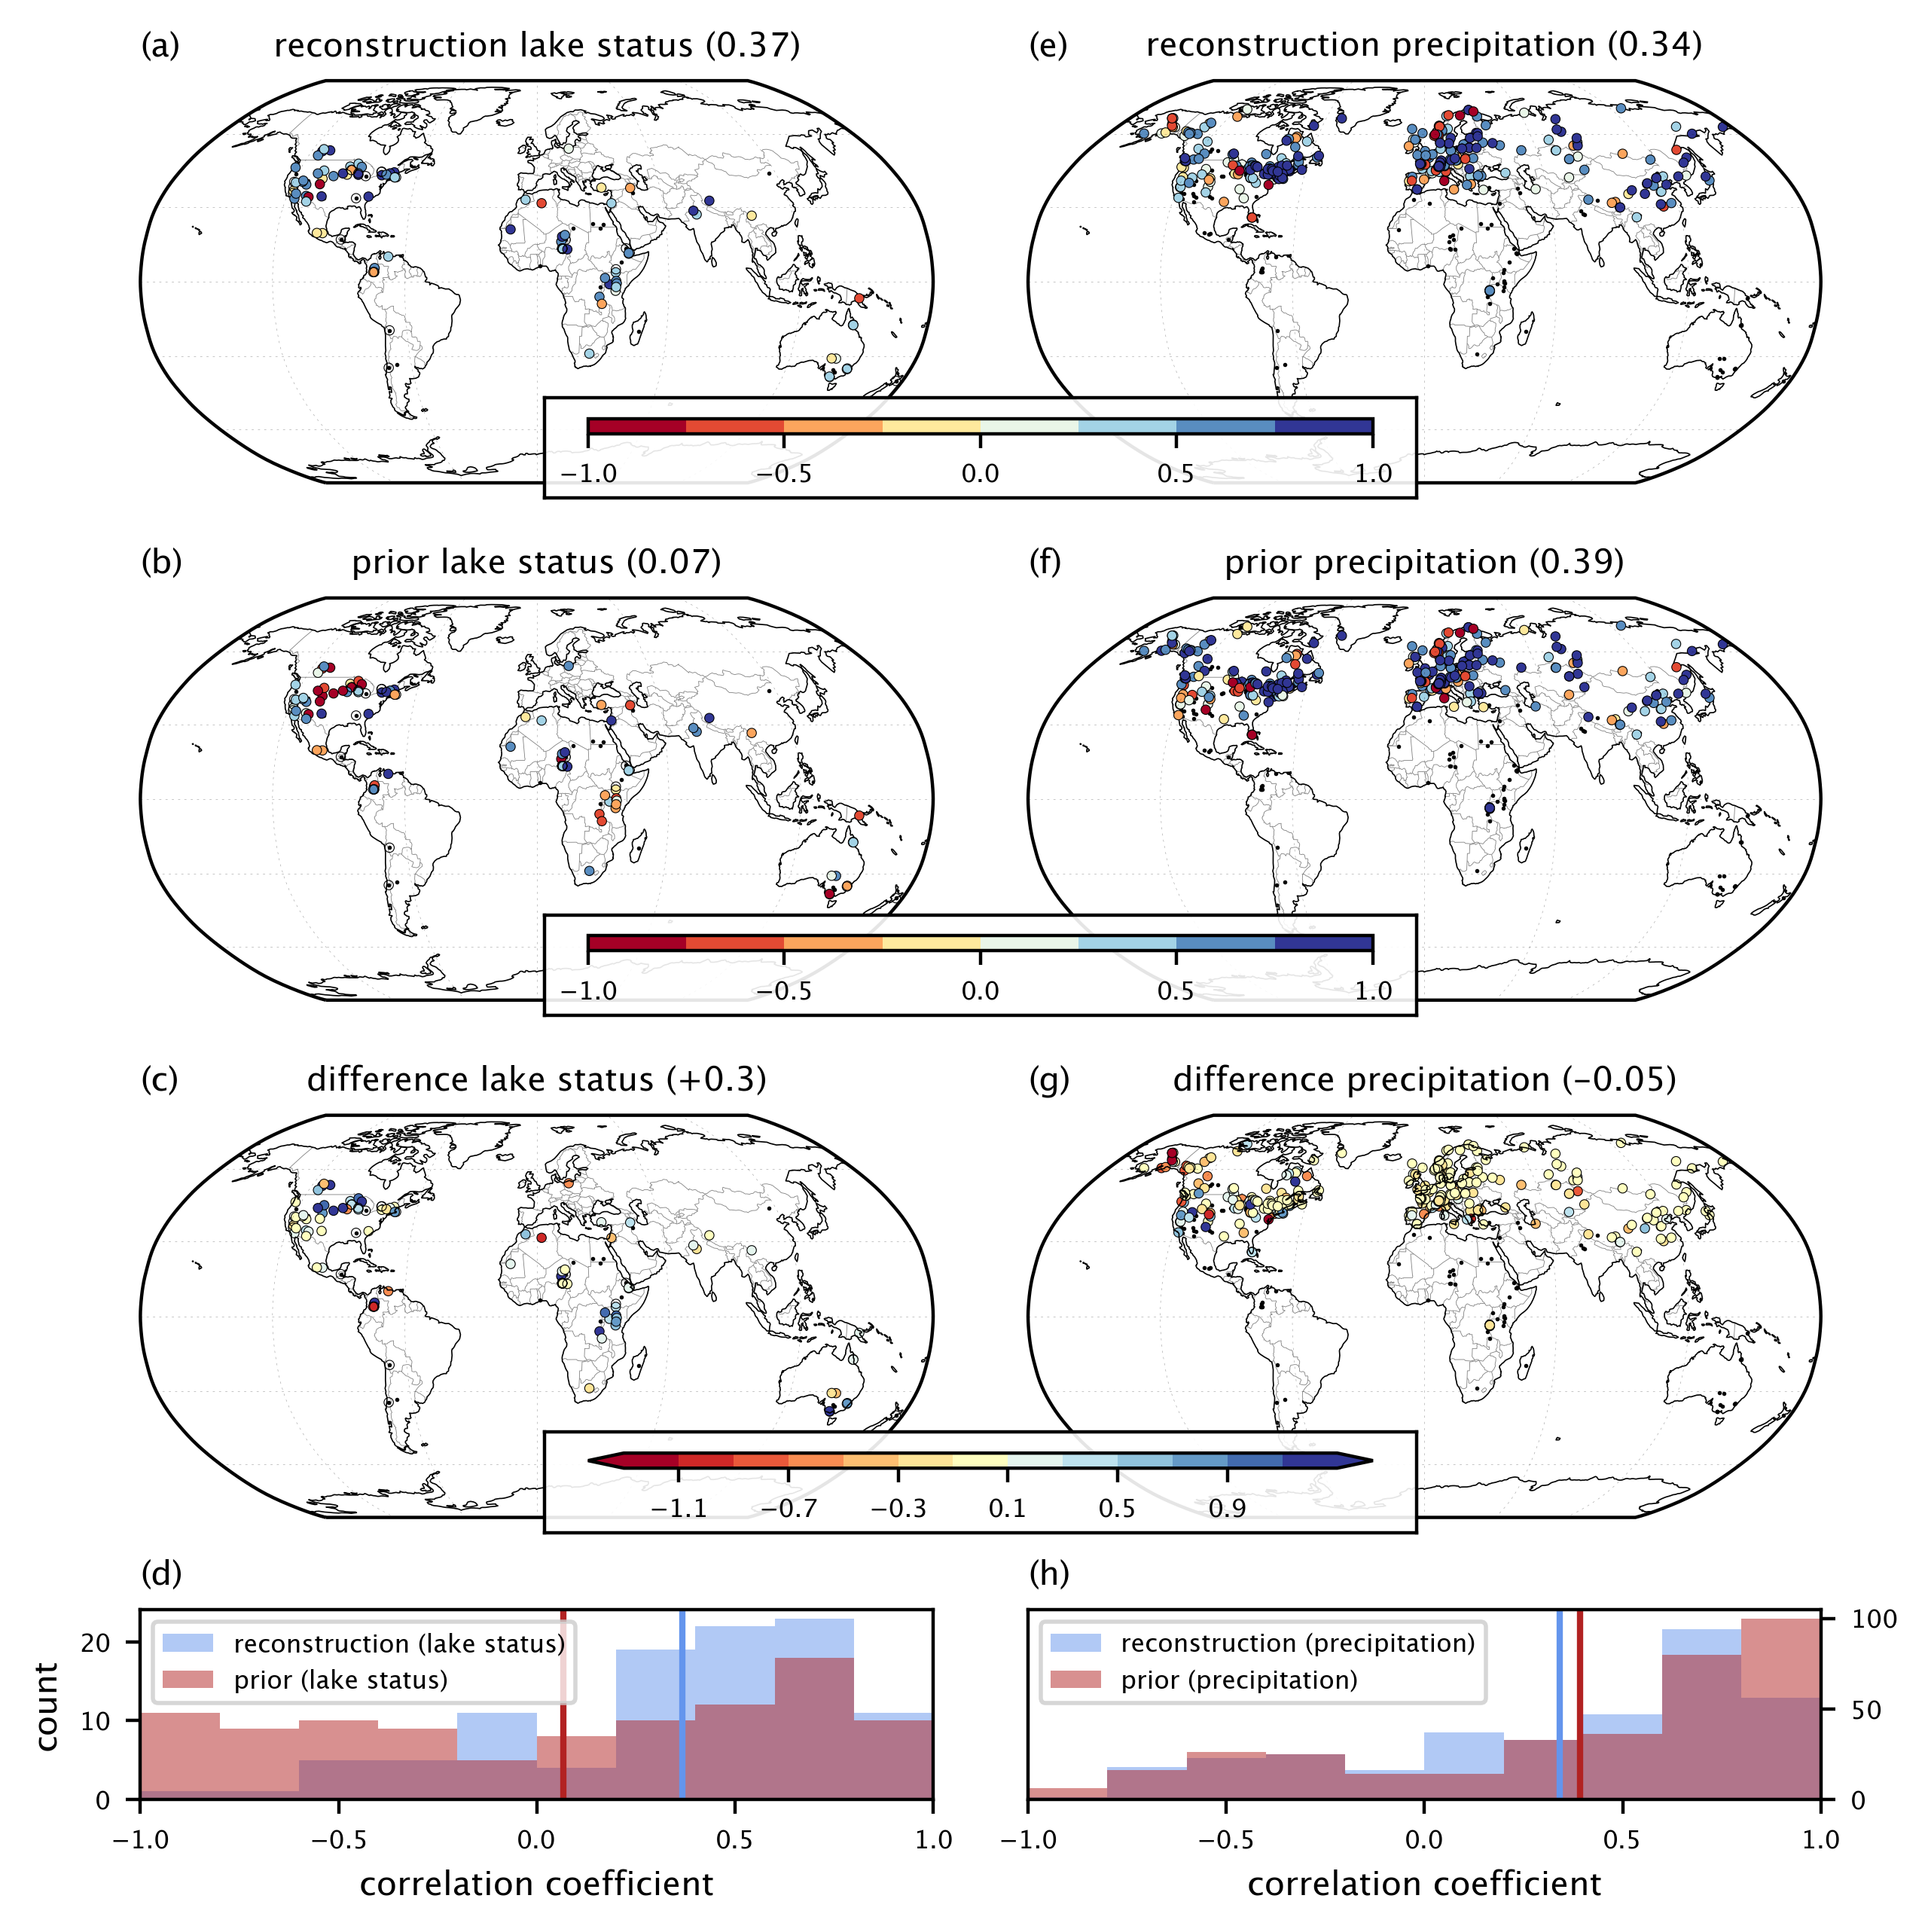

/var/folders/h9/3rpf_h5j01bcy6dw2hfhdm140000gn/T/ipykernel_75293/3517234981.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


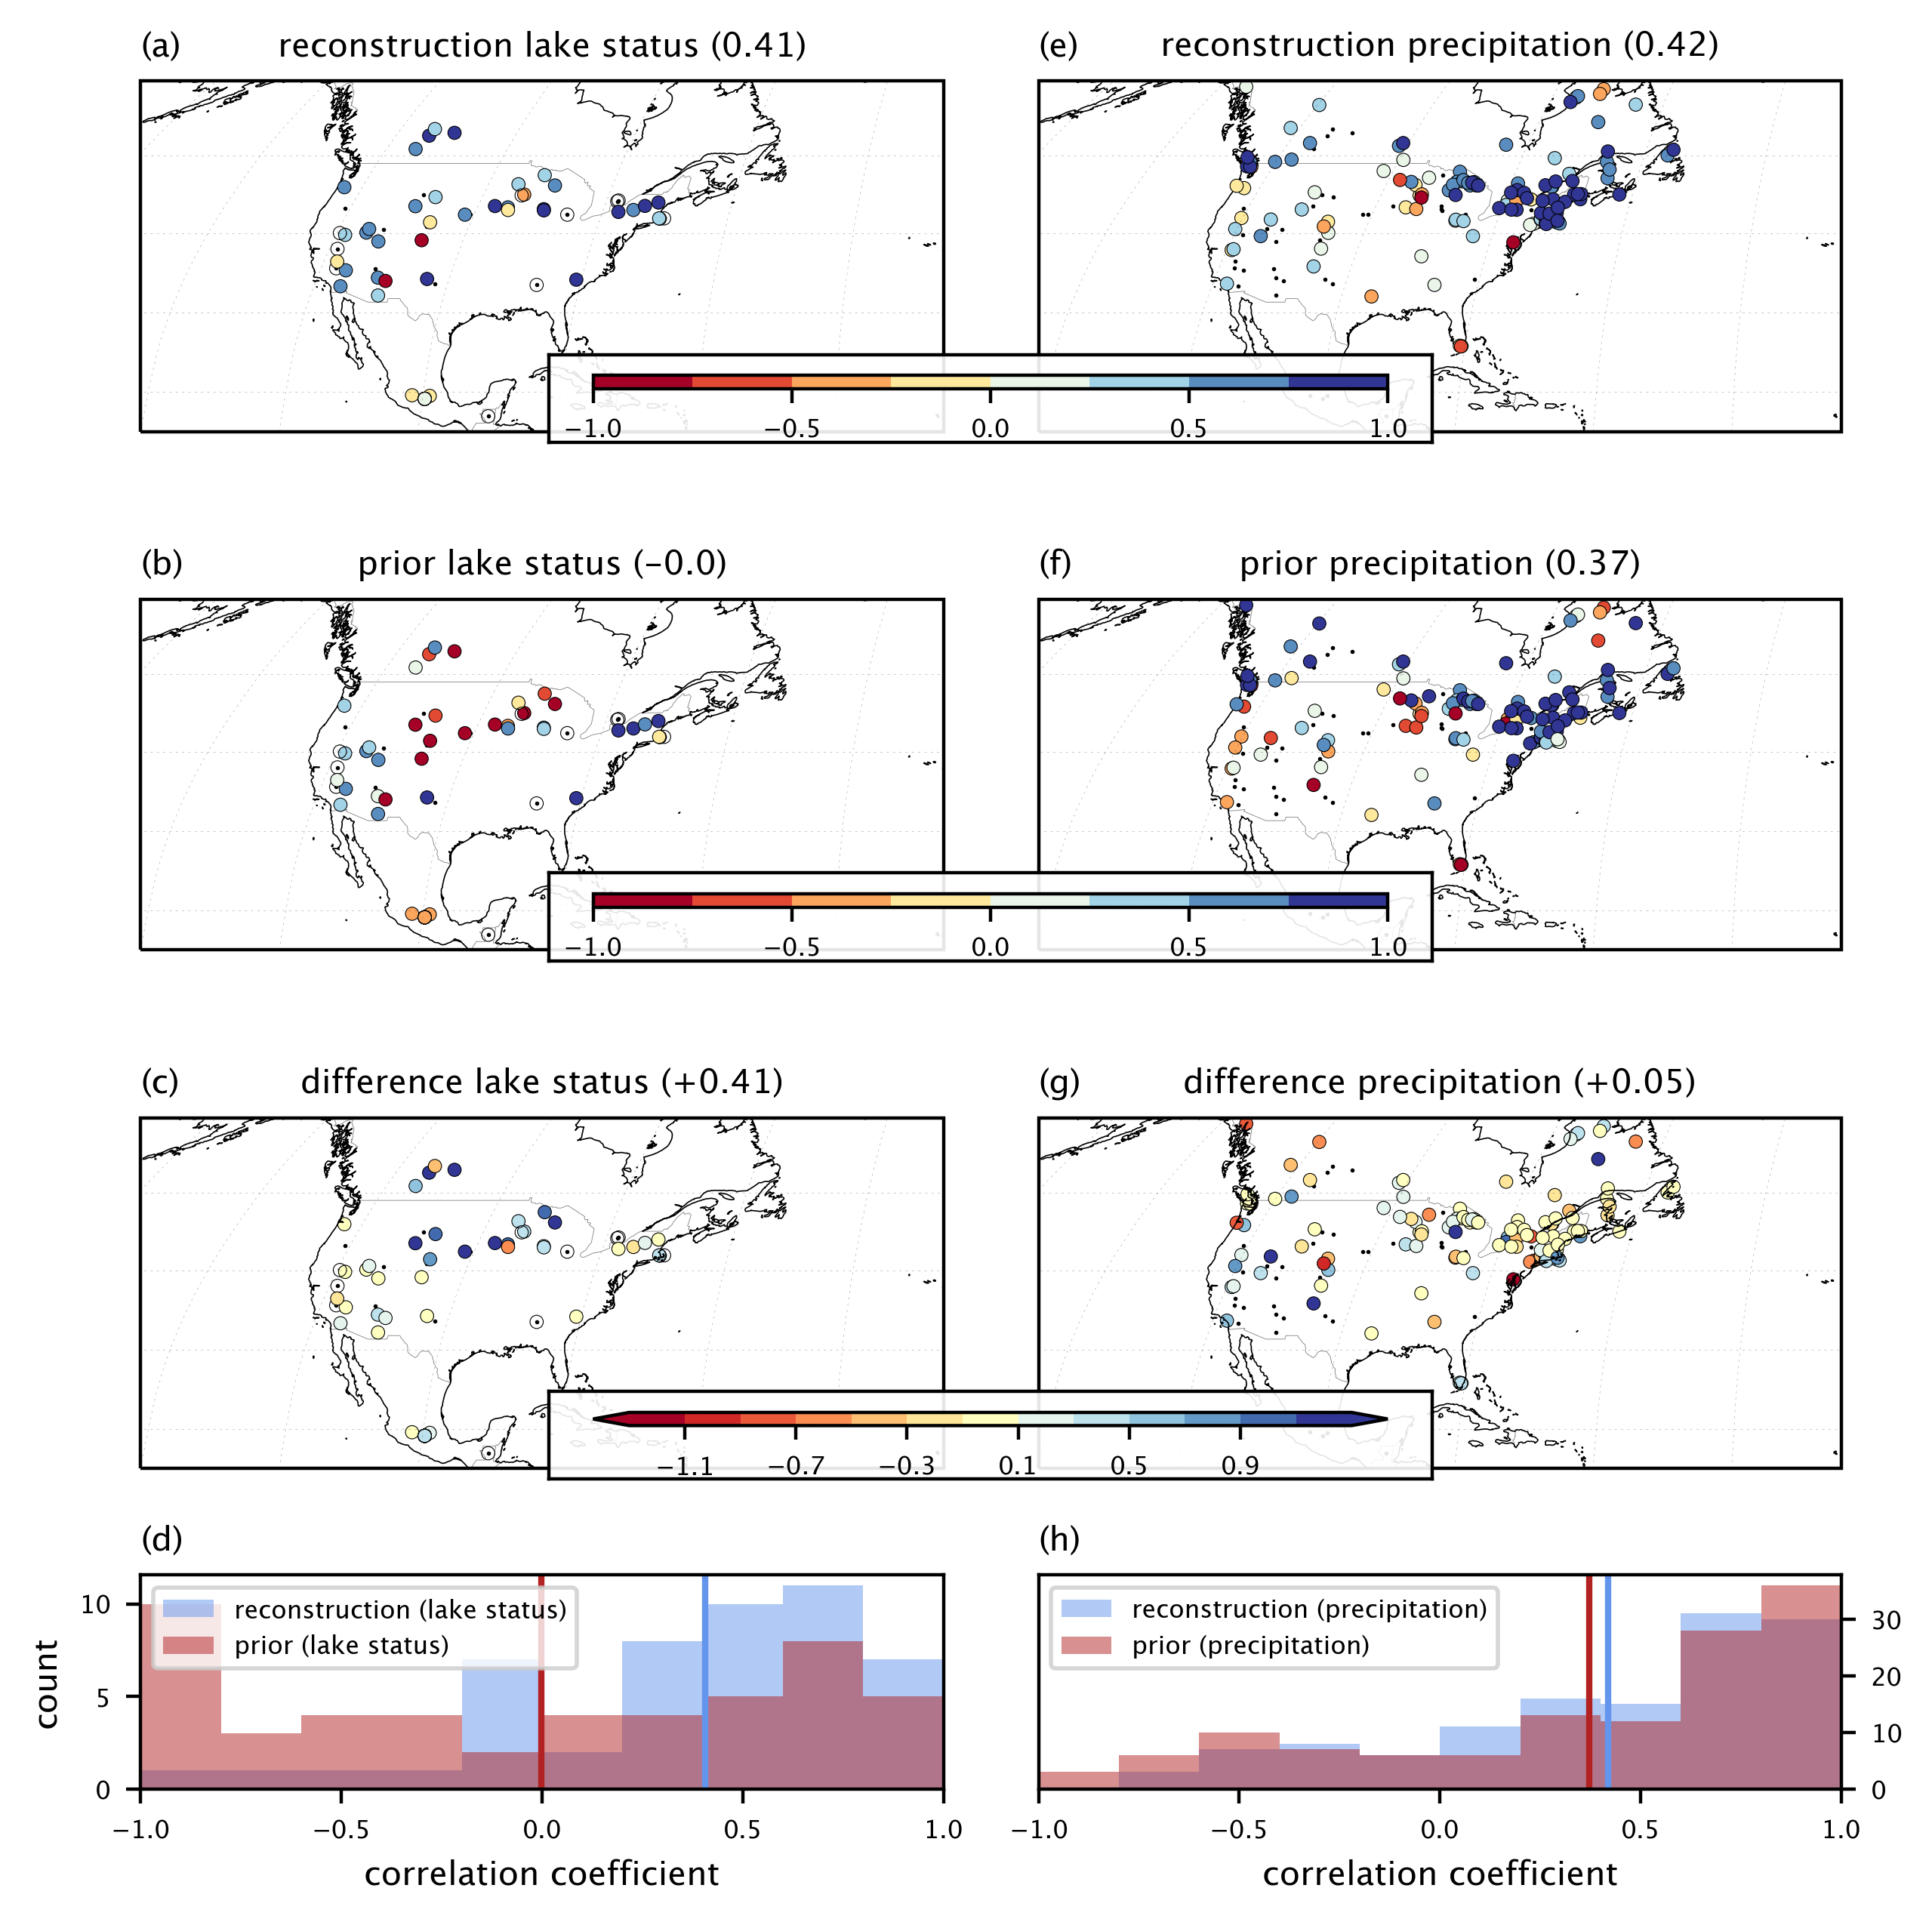

In [6]:
#Map the correlation values
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

#Change the extent variable to select data from a lon/lat range. (Note lon is on a 0-360 scale)
for  extent in [False,[220,330,15,60]]: #lon min, lon max, lat min,lat max
    if extent: s=10
    else: s=5
    #Plot Correlation Skill with withheld proxies
    #Map proxies
    theme = 'default'
    plt.figure(figsize=(6.5,6.5),dpi=400)
    plt.style.use(theme)
    plt.rc('font', **font)
    gs = gridspec.GridSpec(7,2)#,hspace=0.4,wspace=0.1)
    names = [['a','b','c','d'],['e','f','g','h']]
    for col,vn in enumerate(skillMat.keys()):
        vn2 =['lake status','precipitation'][col]
        df = skillMat[vn]['df']
        if extent:
            df = df.loc[(df['lon']>=extent[0]) & (df['lon']<=extent[1]) & (df['lat']>=extent[2]) & (df['lat']<=extent[3])]
        ax_hist = plt.subplot(gs[6,col])
        for row,data in enumerate(['reconstruction','prior','difference']):
            #Set Up Plot
            vals = method+'_'+['recon','prior','diff'][row]
            ax1 = plt.subplot(gs[(row*2):(row*2+2),col],projection=ccrs.Robinson())
            da_plot.plotBaseMap(ax1,proj,lims)
            if extent: ax1.set_extent(extent,crs=ccrs.PlateCarree())
            m = np.round(np.nanmean(df[vals]),2)
            if (m >=0) & (data == 'difference'): m = '+'+str(m)
            else: m = str(m)
            ax1.set_title(data+' '+vn2+' ('+m+')',loc='center',fontsize=8)
            ax1.set_title('('+names[col][row]+')',loc='left',fontsize=8)
            #Plot Proxies 
            idx = np.where(np.isfinite(df[vals]))
            #Plot all proxies to show if any are not relevant
            #
            ax1.scatter(skillMat['LakeStatus']['df'].lon,skillMat['LakeStatus']['df'].lat,c='k',linewidth=0,
                        s=1,transform=ccrs.PlateCarree())
            sorti= np.argsort(np.abs(df[method+'_recon'])).values #[::-1]
            if col == 1:
                cbbox = inset_axes(ax1, '110%', '25%', loc = 'lower center',
                                 bbox_to_anchor=(-0.56, -0.09, 1, 1),bbox_transform=ax1.transAxes)
                cbbox.tick_params(axis = 'both',left = False,top = False,right = False,bottom = False,labelleft = False,labeltop = False,labelright = False,labelbottom = False)
                cbbox.set_facecolor([1,1,1,0.9])
                cbaxes = inset_axes(cbbox,width="90%",  height="15%", loc='upper center')
            if data != 'difference':
                p=ax1.scatter(df.lon.values[sorti],df.lat.values[sorti],c=df[vals].values[sorti],transform=ccrs.PlateCarree(),
                    ec='k',linewidth=0.2,vmin=-1,vmax=1,cmap=plt.cm.get_cmap('RdYlBu',8),s=s,label=vn,zorder=2)
                #Plot histogram
                ax_hist.hist(df[vals],alpha=0.5,label=data+' ('+vn2+')',color=['cornflowerblue','firebrick'][row],bins=np.linspace(-1,1,11))
                ax_hist.axvline(np.nanmean(df[vals]),color=['cornflowerblue','firebrick'][row])
                if col == 1:
                    cbar=plt.colorbar(p,ax=ax1,orientation='horizontal', cax=cbaxes,ticks=np.linspace(-1,1,5))
                    cbar.ax.tick_params(labelsize=6) 
            else: 
                p=ax1.scatter(df.lon.values[sorti],df.lat.values[sorti],c=df[vals].values[sorti],transform=ccrs.PlateCarree(),
                    ec='k',linewidth=0.2,vmin=-1.3,vmax=1.3,cmap=plt.cm.get_cmap('RdYlBu',13),s=s,label=vn)
                if col == 1:
                    cbar = plt.colorbar(p,ax=ax1,orientation='horizontal',extend='both',cax=cbaxes,ticks=np.linspace(-1.1,0.9,6))
                    cbar.ax.tick_params(labelsize=6) 
                #cbar.ax.patch.set_facecolor('white')
        #
        #ax_hist.legend(fontsize=6)
        if col == 0: ax_hist.set_ylabel('count',fontsize=8)
        else:     ax_hist.yaxis.tick_right()
        ax_hist.set_xlabel('correlation coefficient',fontsize=8)
        ax_hist.set_xlim([-1,1])
        ax_hist.set_xticks(np.linspace(-1,1,5))
        ax_hist.tick_params(labelsize=6)
        #ax_hist.set_title('Histogram '+vn2,loc='center',fontsize=8)
        ax_hist.set_title('('+names[col][3]+')',loc='left',fontsize=8)
        ax_hist.legend(fontsize=6)
    #plt.suptitle('Correlation with withheld data',fontsize=8)
    plt.tight_layout()
    if extent: plt.savefig(wd+'Data/results/'+filename+'/'+'Fig4_WithheldSkillLocal.png', dpi=400, bbox_inches ="tight")
    else: plt.savefig(wd+'Data/results/'+filename+'/'+'Fig4_WithheldSkill.png', dpi=400, bbox_inches ="tight")
    plt.show()

In [7]:
save=True
if save:
    skillMat['LakeStatus']['df'].to_csv(wd+'Data/results/'+filename+'/'+'Fig4_LakeStatus_CorrelationDF.csv')
    skillMat['precip']['df'].to_csv(wd+'Data/results/'+filename+'/'+'Fig4_precip_CorrelationDF.csv')

In [8]:
options

{'data_dir': '/Users/chrishancock/Library/CloudStorage/OneDrive-NorthernArizonaUniversity/Research/Manuscript/DAMP21k/Data/',
 'exp_name': 'DAMP21ka10',
 'vars_to_reconstruct': ['tas', 'LakeStatus', 'precip'],
 'season_to_reconstruct': 'annual',
 'time_resolution': 500.0,
 'minimum_resolution': 50.0,
 'maximum_resolution': 500.0,
 'prior_window': 5000.0,
 'prior_mean_always_0': False,
 'assimate_together': False,
 'localization_radius': 10000.0,
 'percent_of_prior': 70.0,
 'seed_for_prior': 0.0,
 'assimilate_selected_seasons': ['annual'],
 'assimilate_selected_archives': False,
 'assimilate_selected_HCproxies': ['CalibratedPollen'],
 'assimilate_selected_region': False,
 'assimilate_selected_resolution': False,
 'percent_to_assimilate': 70.0,
 'seed_for_proxy_choice': 0.0,
 'models_for_prior': ['DAMP_TraCE_regrid', 'DAMP_HadCM_regrid'],
 'proxy_datasets_to_assimilate': ['hydro12k'],
 'version_temp12k': 102.0,
 'version_hydro12k': '0_7_0',
 'age_range_to_reconstruct': [0.0, 21000.0],
 '